In [137]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import numpy as np

In [176]:
sched = pd.read_excel('data/Schedule.xlsx')
standings = pd.read_excel('data/Standings.xlsx')
prev = pd.read_excel('data/Previous Seasons.xlsx')
prev.columns = [c.replace(' ', '_') for c in prev.columns]

<AxesSubplot: xlabel='SeasonKey'>

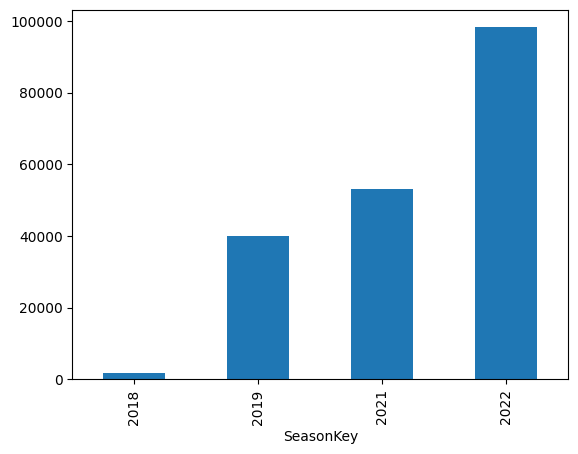

In [4]:
prev.groupby(by='SeasonKey').Premim_Revenue.mean().plot(kind='bar')

In [177]:
prev = prev[prev['SeasonKey'] >= 2021]
prev = prev.reset_index()

<AxesSubplot: xlabel='BowlTier'>

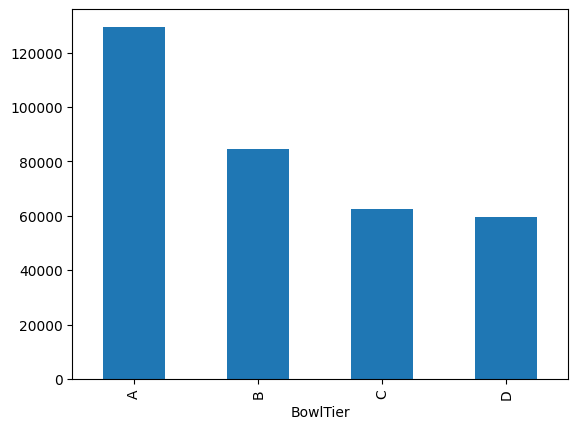

In [46]:
prev.groupby(by='BowlTier').Premim_Revenue.mean().plot(kind='bar')

In [178]:
def conv_tier(tier):
    if tier == "A":
        return 1
    elif tier == "B":
        return 0.75
    elif tier == "C":
        return 0.5
    else:
        return 0.25
prev['BowlTier'] = prev['BowlTier'].map(conv_tier)
prev['SeasonKey'] = prev['SeasonKey'].map(lambda x: x/2022)
prev

,index,SeasonKey,MasterEventName,MasterEventDate,Opponent,HomeGameNumber,HomeGameDateDiff,BowlTier,MonthName,DayofWeek,DayofMonth,IsHoliday,Holiday,CompetingSportingTeamCount,BucksWinFlag,BucksWinCount,BucksLoseCount,BucksWin%,NumofPlayersWhoMadeAllStarTeamLastSeason,Division,Conference,OppPrevSeasonWinCount,OppPrevSeasonLoseCount,OppPrevSeasonWin%,OppPrevSeasonConfSemis,OppPrevSeasonConfFinals,OppPrevSeasonNBAFinals,OppPrevSeasonNBAChamps,Premim_Revenue,Total_Revenue
0,72,0.999505,2021-10-19 Brooklyn Nets,2021-10-19,Brooklyn Nets,1,0,1.00,October,Tuesday,19,0,NaN,NaN,1,1,0,1.000000,3,Atlantic,Eastern,48,24,0.666667,1,0,0,0,107372.16,2.099383e+06
1,73,0.999505,2021-10-27 Minnesota Timberwolves,2021-10-27,Minnesota Timberwolves,2,8,0.25,October,Wednesday,27,0,NaN,NaN,0,3,2,0.600000,0,Northwest,Western,23,49,0.319444,0,0,0,0,31116.80,1.461970e+06
2,74,0.999505,2021-10-30 San Antonio Spurs,2021-10-30,San Antonio Spurs,3,3,0.50,October,Saturday,30,0,NaN,1.0,0,3,3,0.500000,0,Southwest,Western,33,39,0.458333,0,0,0,0,12753.00,1.501470e+06
3,75,0.999505,2021-10-31 Utah Jazz,2021-10-31,Utah Jazz,4,1,0.50,October,Sunday,31,1,Halloween,NaN,0,3,4,0.428571,2,Northwest,Western,52,20,0.722222,1,0,0,0,2564.10,1.430561e+06
4,76,0.999505,2021-11-05 New York Knicks,2021-11-05,New York Knicks,5,5,0.50,November,Friday,5,0,NaN,NaN,0,4,5,0.444444,1,Atlantic,Eastern,41,31,0.569444,1,0,0,0,20842.50,1.547682e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,149,1.000000,2023-03-22 San Antonio Spurs,2023-03-22,San Antonio Spurs,37,3,0.25,March,Wednesday,22,0,NaN,NaN,1,52,20,0.722222,0,Southwest,Western,34,48,0.414634,0,0,0,0,109718.50,1.928239e+06
78,150,1.000000,2023-03-30 Boston Celtics,2023-03-30,Boston Celtics,38,8,1.00,March,Thursday,30,0,NaN,NaN,0,55,22,0.714286,1,Atlantic,Eastern,51,31,0.621951,1,1,1,0,207889.92,2.367048e+06
79,151,1.000000,2023-04-02 Philadelphia 76ers,2023-04-02,Philadelphia 76ers,39,3,0.75,April,Sunday,2,0,NaN,NaN,1,56,22,0.717949,2,Atlantic,Eastern,51,31,0.621951,1,0,0,0,80228.76,1.957190e+06
80,152,1.000000,2023-04-05 Chicago Bulls,2023-04-05,Chicago Bulls,40,3,1.00,April,Wednesday,5,0,NaN,NaN,1,58,22,0.725000,2,Central,Eastern,46,36,0.560976,1,0,0,0,204400.10,2.101114e+06


In [179]:
def conv_teams(team):
    teams = list(prev['Opponent'].drop_duplicates().sort_values())
    for i in range(len(teams)):
        if(team == teams[i]):
            return i
    return 0
prev['Opponent'] = prev['Opponent'].map(conv_teams)

In [180]:
prev

,index,SeasonKey,MasterEventName,MasterEventDate,Opponent,HomeGameNumber,HomeGameDateDiff,BowlTier,MonthName,DayofWeek,DayofMonth,IsHoliday,Holiday,CompetingSportingTeamCount,BucksWinFlag,BucksWinCount,BucksLoseCount,BucksWin%,NumofPlayersWhoMadeAllStarTeamLastSeason,Division,Conference,OppPrevSeasonWinCount,OppPrevSeasonLoseCount,OppPrevSeasonWin%,OppPrevSeasonConfSemis,OppPrevSeasonConfFinals,OppPrevSeasonNBAFinals,OppPrevSeasonNBAChamps,Premim_Revenue,Total_Revenue
0,72,0.999505,2021-10-19 Brooklyn Nets,2021-10-19,2,1,0,1.00,October,Tuesday,19,0,NaN,NaN,1,1,0,1.000000,3,Atlantic,Eastern,48,24,0.666667,1,0,0,0,107372.16,2.099383e+06
1,73,0.999505,2021-10-27 Minnesota Timberwolves,2021-10-27,16,2,8,0.25,October,Wednesday,27,0,NaN,NaN,0,3,2,0.600000,0,Northwest,Western,23,49,0.319444,0,0,0,0,31116.80,1.461970e+06
2,74,0.999505,2021-10-30 San Antonio Spurs,2021-10-30,25,3,3,0.50,October,Saturday,30,0,NaN,1.0,0,3,3,0.500000,0,Southwest,Western,33,39,0.458333,0,0,0,0,12753.00,1.501470e+06
3,75,0.999505,2021-10-31 Utah Jazz,2021-10-31,27,4,1,0.50,October,Sunday,31,1,Halloween,NaN,0,3,4,0.428571,2,Northwest,Western,52,20,0.722222,1,0,0,0,2564.10,1.430561e+06
4,76,0.999505,2021-11-05 New York Knicks,2021-11-05,18,5,5,0.50,November,Friday,5,0,NaN,NaN,0,4,5,0.444444,1,Atlantic,Eastern,41,31,0.569444,1,0,0,0,20842.50,1.547682e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,149,1.000000,2023-03-22 San Antonio Spurs,2023-03-22,25,37,3,0.25,March,Wednesday,22,0,NaN,NaN,1,52,20,0.722222,0,Southwest,Western,34,48,0.414634,0,0,0,0,109718.50,1.928239e+06
78,150,1.000000,2023-03-30 Boston Celtics,2023-03-30,1,38,8,1.00,March,Thursday,30,0,NaN,NaN,0,55,22,0.714286,1,Atlantic,Eastern,51,31,0.621951,1,1,1,0,207889.92,2.367048e+06
79,151,1.000000,2023-04-02 Philadelphia 76ers,2023-04-02,21,39,3,0.75,April,Sunday,2,0,NaN,NaN,1,56,22,0.717949,2,Atlantic,Eastern,51,31,0.621951,1,0,0,0,80228.76,1.957190e+06
80,152,1.000000,2023-04-05 Chicago Bulls,2023-04-05,4,40,3,1.00,April,Wednesday,5,0,NaN,NaN,1,58,22,0.725000,2,Central,Eastern,46,36,0.560976,1,0,0,0,204400.10,2.101114e+06


In [139]:
def ridge_fit_and_predict(df, thres, predictors, res):
    new_df = pd.DataFrame(columns=df.columns)
    training = pd.DataFrame(columns=df.columns)
    if thres > 1:
        thres = 1
    num = int(len(df)*thres)
    rng = np.random.default_rng()
    ind = list(rng.choice(len(df), size=num, replace=False))
    for i, row in df.iterrows():
        if i in ind:
            new_df = pd.concat([df.iloc[[i]], new_df])
        else:
            training = pd.concat([df.iloc[[i]], training])
    model = Ridge(alpha=1.0)
    all_cols = predictors + [res]
    rev = new_df[res]
    preds = new_df[predictors]
    training = training[all_cols]
    model.fit(preds, rev)
    y_true = training[res]
    y_pred = model.predict(training.drop([res], axis=1))
    print("r^2: " + str(r2_score(y_true, y_pred)) + "\n")
    print('Coefficient summary:')
    coefs = list(model.coef_)
    for i in range(len(coefs)):
        print(predictors[i] + ": " + str(coefs[i]))
        
    return model

In [191]:
m = ridge_fit_and_predict(prev, 0.75, ['Opponent', 'HomeGameNumber', 
                  'BucksWinCount',
                  'NumofPlayersWhoMadeAllStarTeamLastSeason',
                  'OppPrevSeasonWin%' 
                ], 'Premim_Revenue')

r^2: 0.46369783795730346

Coefficient summary:
Opponent: -984.2868903712522
HomeGameNumber: -5829.679608329109
BucksWinCount: 5631.4632860071915
NumofPlayersWhoMadeAllStarTeamLastSeason: 14923.877228086889
OppPrevSeasonWin%: 2889.0510600676507


In [192]:
def ridge_cv_fit(df, alphas, predictors, res):
    res_set = df[res]
    pred_set = df[predictors]
    clf = RidgeCV(alphas=alphas).fit(pred_set, res_set)
    return clf

In [193]:
m = ridge_cv_fit(prev, alphas=[1e-3, 1e-2, 1e-1, 1], predictors=[
                  'Opponent',
                  'HomeGameNumber', 
                  'BucksWinCount',
                  'NumofPlayersWhoMadeAllStarTeamLastSeason',
                  'OppPrevSeasonWin%', 'OppPrevSeasonNBAChamps'],res='Premim_Revenue')
print(m.score(prev[[
                  'Opponent',
                  'HomeGameNumber', 
                  'BucksWinCount',
                  'NumofPlayersWhoMadeAllStarTeamLastSeason',
                  'OppPrevSeasonWin%', 'OppPrevSeasonNBAChamps']], prev['Premim_Revenue']))
list(m.coef_ + [m.intercept_])

0.5068806257071876


[45142.06613587802,
 39617.02606701529,
 52042.63663340481,
 59850.666475494014,
 47766.50135333222,
 97975.25459861224]